#**Introdução**
###**Desafio Regressão**

Desafio elaborado por: 
Marcus Oliveira da Silva - QuintoAndar Senior Data Science Manager 

(https://www.youtube.com/watch?v=NC1P4AFTj54)

####**Contexto analítico**

Nesse desafio, você deve resolver um case de precificação de imóveis. Esse desafio foi construído em parceria entre a Tera e o QuintoAndar, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.

Imagine-se na seguinte situação: a área de marketing do QuintoAndar quer montar uma calculadora de preço (como esta [aqui: https://mkt.quintoandar.com.br/quanto-cobrar-de-aluguel/), e nesse projeto, os analistas negociais e corretores querem, também, entender as principais variáveis e características chaves que influenciam no valor de venda do imóvel (Ex: quantificar o impacto do aumento da área do imóvel no preço, ou quantificar o impacto de ter piscina, ou não no preço). Você é o cientista de dados que atuará na resolução desse case.

Para tanto, existem dois objetivos principais:

**Objetivo 1**, interpretabilidade: construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

**Objetivo 2**, predição: construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como a calculadora de preço. Note que, em uma situação real, um alto erro de inferência pode gerar grande insatisfação em um proprietário de imóvel, que pode ficar ofendido com o resultado. Por isso, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo seja complexo e tenha uma interpretação mais difícil.

####**Base de dados**

O conjunto de dados descreve a venda de propriedades residenciais individuais de uma cidade americana, de 2006 a 2010. O conjunto de dados contém 1460 observações e um grande número de features (23 nominais, 23 ordinais, 14 discretas e 20 contínuas) envolvidas na avaliação do valor dos imóveis, ou seja, são 80 variáveis explicativas.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [4]:
df = pd.read_csv("/content/base.csv")
df

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [6]:
#Pegando as variaveis numericas 
num_vars = df.select_dtypes(include =['int','float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove('PrecoVenda')
print(f'Variaveis numericas {num_vars}')
print(' ')

#pegando as variaveis categoricas
cat_vars = df.select_dtypes(include =['object']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'Variaveis categoricas {cat_vars}')

Variaveis numericas ['Id', 'Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
 
Variaveis categoricas ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'Qua

#Analise exploratoria

### Analise Univariada 

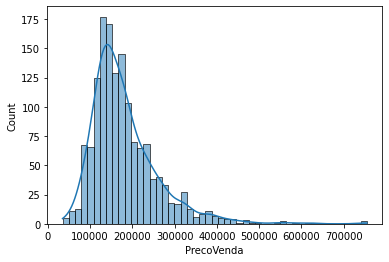

In [26]:
#visualizando a distribuição da nossa variavel target Preco de venda 
sns.histplot(df['PrecoVenda'],kde = True)

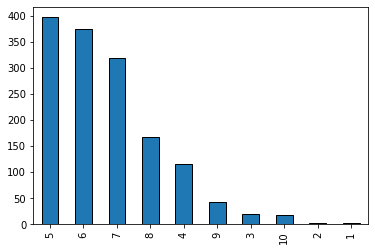

In [30]:
#visualizando a distribuição de qualidade de materiais usado na construção da casa. 
#sendo 1 muito ruim e 10 muito excelente.
df["Qualidade"].value_counts().plot(kind = 'bar',edgecolor = 'k')

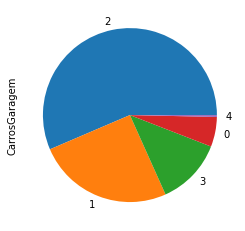

In [32]:
#Visualizando tamanho da garagem em capacidade de carros
df["CarrosGaragem"].value_counts().plot(kind = 'pie')

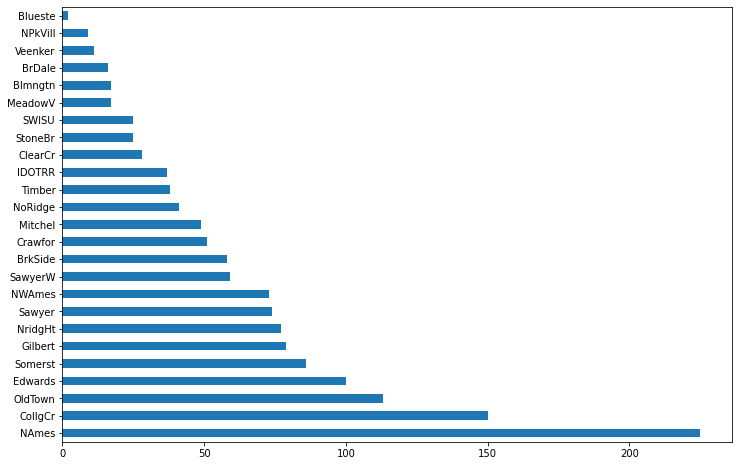

In [20]:
#visualizando a distribuição por bairros 
df["Bairro"].value_counts().plot(kind = 'barh',figsize = (12,8))

### Analise Bivariada 

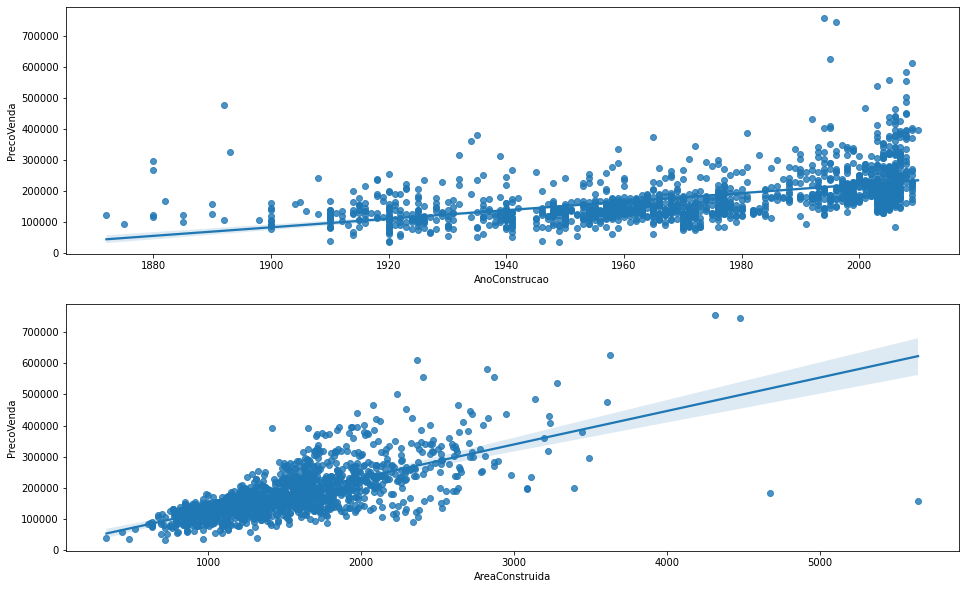

In [29]:
fig, axs = plt.subplots(figsize = (16,10),ncols = 1, nrows = 2)

#visualizando a relação de ano de construção com preço de venda 
sns.regplot(x='AnoConstrucao', y = 'PrecoVenda', data = df,ax=axs[0])
#visualizando a relação de area construida com preço de venda
sns.regplot(x='AreaConstruida', y = 'PrecoVenda', data = df,ax=axs[1])
